In [1]:
import matplotlib.pyplot as plt
import time
from IPython import display
from xml.dom import minidom
import math
import folium
import pandas as pd
from pandas.io.json import json_normalize
import tqdm 
import numpy as np
import geopandas as gpd
import contextily as cx
from random import randint
import json

import warnings
warnings.filterwarnings("ignore")

# Routes

In [2]:
routes= gpd.read_file('Data/GIS/bus_routes/validated4-1-2023.json')

In [3]:
routes.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Turkey. Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

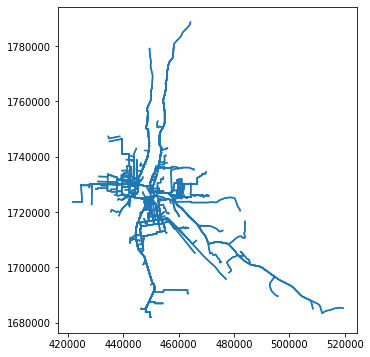

In [4]:
routes.plot(figsize=(6, 6))

In [5]:
routes

,FID,OBJECTID,Name,Station_ID,Bus_type,Fees,Trip_Type,SHAPE_Leng,validated,geometry
0,0,1,الخرطوم - السوق المحلي,0,0,0.0,1,9462.706579,YES,"LINESTRING (451066.154 1715990.325, 451058.689..."
1,1,2,الخرطوم - السوق المركزي,0,0,0.0,1,9123.981371,YES,"LINESTRING (451705.725 1717152.322, 451604.355..."
2,2,3,الخرطوم - اركويت,0,0,0.0,1,10560.812416,YES,"LINESTRING (453189.237 1717919.433, 453145.271..."
3,3,4,الخرطوم - السوق المحلي,0,0,0.0,0,8983.359243,YES,"LINESTRING (448710.075 1723992.469, 448714.676..."
4,4,5,الخرطوم - السوق المركزي,0,0,0.0,0,8950.474195,YES,"LINESTRING (448710.075 1723992.469, 448714.676..."
...,...,...,...,...,...,...,...,...,...,...
425,425,619,صابرين - ليبيا ابوزيد,0,0,0.0,0,14994.819478,YES,"LINESTRING (443688.725 1738629.556, 443507.002..."
426,426,620,صابرين - ليبيا ابوزيد,0,0,0.0,1,14994.819478,YES,"LINESTRING (443688.725 1738629.556, 443507.002..."
427,427,625,الخرطوم - امبدة العاشرة,0,0,0.0,0,17131.593509,YES,"LINESTRING (439727.028 1733499.374, 439669.105..."
428,428,626,الخرطوم - امبدة العاشرة,0,0,0.0,1,18476.139009,YES,"LINESTRING (448620.935 1724032.574, 448631.520..."


In [ ]:
color = []
n = len(routes)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [ ]:
ax = routes.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.50, linewidth= 3, edgecolor=color, legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3600000, 3645000])
plt.ylim([1740000, 1780000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg')

In [ ]:
### TO DO ###

f = folium.Figure(width=800, height=800)

the_map= folium.Map(location=[15.5007, 32.5599],
                    zoom_start = 17, tiles='openstreetmap').add_to(f)
add_all_tiles(the_map)

folium.PolyLine(routes.geometry[0]).add_to(the_map_map)

# Add layer control to change tiles:
folium.LayerControl(sortLayers=True).add_to(the_map)

# To store the map as a HTML page:
# the_map.save('map_001.html')

# To display the map in a Jupyter notebook:
the_map

# Neighborhoods

In [ ]:
#for neighborhoods geojson
from shapely import wkt

neighborhoods= gpd.read_file('Data/GIS/other_layers/krt_neighborhoods.json')

neighborhoods['PAU_NAME']= neighborhoods.PAU_NAME.str.encode('cp1252')
neighborhoods['PAU_NAME']= neighborhoods.PAU_NAME.str.decode('cp1256')

neighborhoods['Loc_Name']= neighborhoods.Loc_Name.str.encode('cp1252')
neighborhoods['Loc_Name']= neighborhoods.Loc_Name.str.decode('cp1256')

neighborhoods['AU_Name']= neighborhoods.AU_Name.str.encode('cp1252')
neighborhoods['AU_Name']= neighborhoods.AU_Name.str.decode('cp1256')

neighborhoods['PAU_NAME_1']= neighborhoods.PAU_NAME_1.str.encode('cp1252')
neighborhoods['PAU_NAME_1']= neighborhoods.PAU_NAME_1.str.decode('cp1256')

neighborhoods['Loc_Name_1']= neighborhoods.Loc_Name_1.str.encode('cp1252')
neighborhoods['Loc_Name_1']= neighborhoods.Loc_Name_1.str.decode('cp1256')

neighborhoods['AU_Name_1']= neighborhoods.AU_Name_1.str.encode('cp1252')
neighborhoods['AU_Name_1']= neighborhoods.AU_Name_1.str.decode('cp1256')

In [ ]:
neighborhoods.columns = [x.lower() for x in neighborhoods.columns]
neighborhoods.crs

In [ ]:
ax = neighborhoods.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
plt.xlim([32.00, 33.00])
plt.ylim([15.20, 16.00])
plt.grid()

In [ ]:
color = []
n = len(neighborhoods)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [ ]:
#neighborhoods['House_Hold']= neighborhoods.House_Hold.replace(' ', 0).astype('int')
neighborhoods= neighborhoods.drop(neighborhoods[neighborhoods.house_hold == ' '].index.values)
neighborhoods['house_hold']= neighborhoods.house_hold.astype('int')
neighborhoods= neighborhoods[neighborhoods.house_hold <= 3000] #filtering out one extreme neigborhood

In [ ]:
#ax = neighborhoods.to_crs(epsg=3857).plot(figsize=(20, 20), alpha=0.75, linewidth= 1, edgecolor='k', legend= True)
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'house_hold', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[500, 1000, 1500, 2000, 2500]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('neighborhood_map.jpg')

## Survey Responses

In [ ]:
data= pd.read_excel('Data/Mobility_Survey/survey_responses.xlsx')
#data= pd.read_csv('matched_responces.csv') #for reading processed data

data.head()

In [ ]:
print(data.cost.describe())
data.cost.hist(bins=30)

In [ ]:
print(data.household.describe())
data[data.household <= 15].household.hist(bins=30)

In [ ]:
print(data.household_youth.describe())
data[data.household_youth <= 15].household_youth.hist(bins=30)

In [ ]:
data.Timestamp

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(x= data.Timestamp.dt.day, y= data.index.values)
plt.grid()

plt.subplot(1,2,2)
sns.lineplot(x= data.Timestamp.dt.hour, y= data.index.values) #Hour is in US EST (KRT - 6)
plt.grid()

In [ ]:
print(data.origin.value_counts())
print(data.destination.value_counts())

In [ ]:
data['origin']= data.origin.astype('str').apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
data['destination']= data.destination.astype('str').apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
print(data.origin.value_counts())
print(data.destination.value_counts())

In [ ]:
#get counts
neighborhoods.loc_name.value_counts()

In [ ]:
#fix naming
neighborhoods.loc_name[neighborhoods.loc_name == 'بحرى شمال'] = 'بحري'
neighborhoods['loc_name']= neighborhoods.loc_name.apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
neighborhoods['au_name']= neighborhoods.au_name.apply(lambda x: x.replace('أ','ا').replace('ة','ه').replace('ى','ي'))
neighborhoods.loc_name.value_counts()

In [ ]:
neighborhoods.dropna(subset=['fid'], inplace= True)
neighborhoods.reset_index(drop= True, inplace= True)
neighborhoods.house_hold.hist(bins= 100)

In [ ]:
neighborhoods.groupby(['loc_name', 'au_name'])[['fid']].count()

In [ ]:
trial= ['الخرطوم شرق', 'اركويت جامعه', 'الكلاكلة', 'كافوري', 'صالحه', 'الأزهري', 'المهندسين', 'الدروشاب']

In [ ]:
#using difflib
import difflib
def string_similarity(str1, str2):
    str1= ''.join([i for i in str1 if not i.isdigit()])
    str2= ''.join([i for i in str2 if not i.isdigit()])
    str2= str2.replace('أ','ا').replace('ة','ه').replace('ى','ي')
    #str2= str2[:len(str2.partition(' ')[0])+3]
    str1= str1.replace('أ','ا').replace('ة','ه').replace('ى','ي')[:len(str2)]
    result =  difflib.SequenceMatcher(a=str1, b=str2)
    return result.ratio()

In [ ]:
#using bioalign
from Bio.Align import PairwiseAligner
def string_similarity_(str1, str2):
    aligner = PairwiseAligner()
    return aligner.score(str1, str2)/len(str2)

In [ ]:
match= []

for t in range(len(trial)):
    max_score= 0
    max_index= 0
    for n in range(len(neighborhoods.pau_name)):
        score= string_similarity(neighborhoods.pau_name.iat[n], trial[t])
#         score_au= string_similarity(neighborhoods.au_name.iat[n], trial[t])
#         score = score_au if score_au > score else score
        #score= string_similarity(str(neighborhoods.pau_name[n].replace('أ','ا').replace('ة','ه')),
        #                         str(trial[t].replace('أ','ا').replace('ة','ه')))
        #score= string_similarity(str(neighborhoods.pau_name[n].encode), str(trial[t].encode))
        #max_score= score if score > max_score else score
        if score > max_score:
            max_score = score
            max_index = n
    if max_score < 0.65:
        match.append([trial[t], 'No Match Found', round(max_score,3)])
    else:
        match.append([trial[t], neighborhoods.pau_name.iat[max_index], round(max_score,3)])

In [ ]:
print(match)

In [ ]:
#for survey data
data['matched_origin'] = None
data['matching_score'] = 0

with tqdm.tqdm(total= len(data), position=0, leave=True) as pbar:
    for o in range(len(data)):
        pbar.update(1)
        max_score= 0
        max_index= 0
        for n in range(len(neighborhoods.pau_name)):
            score= string_similarity(neighborhoods.pau_name.iat[n], data.origin[o])
#             score_au= string_similarity(neighborhoods.au_name.iat[n], data.origin[o])
#             score = score_au if score_au > score else score

            if score > max_score:
                max_score = score
                max_index = n
        if max_score < 0.70:
            data.at[o, 'matched_origin'] = 'No Match Found'
        else:
            data.at[o, 'matched_origin'] = neighborhoods.pau_name.iat[max_index]
            data.at[o, 'matching_score'] = round(max_score,3)

In [ ]:
#show matching diagnostics
print(f'Percent unmatched= {round(len(data[data.matched_origin == "No Match Found"])/len(data),3)*100}')
data[['origin', 'matched_origin', 'matching_score']]

In [ ]:
#similarly for destinations
#for survey data
data['matched_destination'] = None
data['matching_score_d'] = 0

with tqdm.tqdm(total= len(data), position=0, leave=True) as pbar:
    for o in range(len(data)):
        pbar.update(1)
        max_score= 0
        max_index= 0
        for n in range(len(neighborhoods.pau_name)):
            score= string_similarity(neighborhoods.pau_name.iat[n], data.destination[o])
            if score > max_score:
                max_score = score
                max_index = n
        if max_score < 0.70:
            data.at[o, 'matched_destination'] = 'No Match Found'
        else:
            data.at[o, 'matched_destination'] = neighborhoods.pau_name.iat[max_index]
            data.at[o, 'matching_score_d'] = round(max_score,3)
            
print(f'Percent unmatched= {round(len(data[data.matched_destination == "No Match Found"])/len(data),3)*100}')
data[['destination', 'matched_destination', 'matching_score_d']]

In [ ]:
neighborhoods['survey_count'] = 0

with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_origin.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

In [ ]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(15, 15), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1, 10,20,30,40,50]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg')

# using GeoCode

In [ ]:
gcd_data= data[data.matched_origin == 'No Match Found']

In [ ]:
gcd_data['location'] = gcd_data.origin+', الخرطوم, السودان'

In [ ]:
test= gpd.tools.geocode(gcd_data.location.sample(20))
test= test.to_crs(epsg=4326)

In [ ]:
ax = neighborhoods.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
test.plot(ax=ax, c='r')
plt.xlim([32.00, 33.00])
plt.ylim([15.20, 16.00])
plt.grid()

In [ ]:
from shapely.geometry import Point, Polygon

test['pau_name'] = 'Unknown'
with tqdm.tqdm(total= len(test), position=0, leave=True) as pbar:
    for i in range(len(test)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(test.geometry.iat[i])):
                    test.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue

In [ ]:
#geocode everything

counter = 0
batch = 10
gcd = pd.DataFrame()

with tqdm.tqdm(total= np.ceil(len(gcd_data)/batch), position=0, leave=True) as pbar:
    for i in range(int(np.ceil(len(gcd_data)/batch))):
        pbar.update(1)
        test= gpd.tools.geocode(gcd_data.location[counter:counter+batch])
        gcd= pd.concat([gcd, test])
        counter += batch
        time.sleep(10) #break down requests
gcd= gcd.to_crs(epsg=4326)

In [ ]:
gcd['pau_name'] = 'Unknown'

with tqdm.tqdm(total= len(gcd), position=0, leave=True) as pbar:
    for i in range(len(gcd)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(gcd.geometry.iat[i])):
                    gcd.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue

In [ ]:
for response in gcd.index.values:
    data.matched_origin.at[response] = gcd.pau_name.at[response]
    
print(f'Percent unmatched= {round(len(data[data.matched_origin == "Unknown"])/len(data),3)*100}')
data[['origin', 'matched_origin', 'matching_score']]

In [ ]:
neighborhoods['survey_count'] = 0

with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_origin.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

In [ ]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,20,30,40,50,100]),
                                          linewidth=1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg') #print on 20x20

In [ ]:
routes= gpd.read_file('Data/GIS/bus_routes/validated4-1-2023.json')

color = []
n = len(routes)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [ ]:
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,20,30,40,50,100]),
                                          linewidth= 0.50, edgecolor='k', legend= True)
routes.to_crs(epsg=3857).plot(ax=ax, alpha=1.0, linewidth= 3, edgecolor=color, legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('routes.jpg') #print on 20x20

In [ ]:
#same thing for destinations
#if it breaks, remove everything until creating gcd and replace tqdm total - i, i range(i,int(np.ceil...))

gcd_data= data[data.matched_destination == 'No Match Found']
gcd_data['location'] = gcd_data.destination+', الخرطوم, السودان'

counter = 0
batch = 10
gcd = pd.DataFrame()
print('Geocoding in Progress...')
with tqdm.tqdm(total= np.ceil(len(gcd_data)/batch), position=0, leave=True) as pbar:
    for i in range(int(np.ceil(len(gcd_data)/batch))):
        pbar.update(1)
        test= gpd.tools.geocode(gcd_data.location[counter:counter+batch])
        gcd= pd.concat([gcd, test])
        counter += batch
        time.sleep(15) #break down requests
gcd= gcd.to_crs(epsg=4326)
gcd['pau_name'] = 'Unknown'

print('Geocoding Matching...')
with tqdm.tqdm(total= len(gcd), position=0, leave=True) as pbar:
    for i in range(len(gcd)):
        pbar.update(1)
        for j in range(len(neighborhoods)):
            try:
                if Polygon(neighborhoods.geometry.iat[j]).contains(Point(gcd.geometry.iat[i])):
                    gcd.pau_name.iat[i]= neighborhoods.pau_name.iat[j]
            except:
                continue
    
for response in gcd.index.values:
    data.matched_destination.at[response] = gcd.pau_name.at[response]
print(f'Percent unmatched= {round(len(data[data.matched_destination == "Unknown"])/len(data),3)*100}')
data[['destination', 'matched_destination', 'matching_score']]

print('Counting...')
neighborhoods['survey_count'] = 0
with tqdm.tqdm(total= len(neighborhoods), position= 0, leave= True) as pbar:
    for n in range(len(neighborhoods)):
        pbar.update(1)
        try:
            neighborhoods.survey_count.iat[n]= data.matched_destination.value_counts()[neighborhoods.pau_name.iat[n]]
        except:
            continue

print('Plotting...')           
ax = neighborhoods.to_crs(epsg=3857).plot(column= 'survey_count', figsize=(10, 10), alpha=0.75, cmap= 'turbo',
                                          scheme= 'user_defined',
                                          classification_kwds=dict(bins=[1,10,25,50,100,250]),
                                          linewidth= 1, edgecolor='k', legend= True)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom= 11)
plt.xlim([3595000, 3650000])
plt.ylim([1730000, 1785000])
ax.set_axis_off()

#plt.savefig('validated_map_.jpg')

In [ ]:
#data.to_csv('matched_responces.csv', index= False)

In [ ]:
x= data.groupby(['matched_origin', 'matched_destination'])[['per_day']].count()
x.reset_index(inplace= True)
x.sort_values('per_day', ascending= False)

In [ ]:
x= data.groupby(['origin_locality', 'destination_locality'])[['per_day']].count()
x.reset_index(inplace= True)
x.sort_values('per_day', ascending= False)